 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\andre\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
count_nan = len(algo_df) - algo_df.count()
count_nan

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
#algo_df = algo_df.dropna(inplace=True)
#algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_df['Close'] = sp500_df['Close'].str.replace("$", "")
sp500_df['Close'] = sp500_df['Close'].str.replace(",", "")
sp500_df['Close'] = sp500_df['Close'].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
SP500_daily_returns = sp500_df.pct_change()
SP500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
# YOUR CODE HERE
SP500_daily_returns = sp500_df.dropna()
SP500_daily_returns.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [13]:
# Rename Column
# YOUR CODE HERE
SP500_daily_returns = SP500_daily_returns.rename(columns={"Close":"SP500"})
SP500_daily_returns.head()

,SP500
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
concat_df = pd.concat([whale_df, algo_df, SP500_daily_returns], axis="columns", join="inner")
concat_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

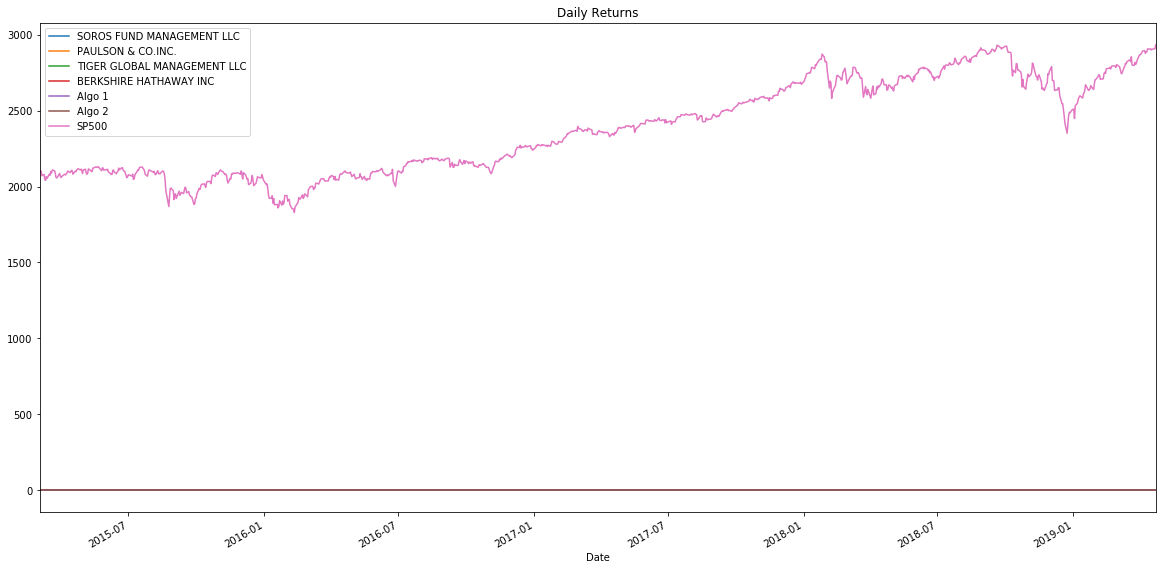

In [20]:
# Plot daily returns
# YOUR CODE HERE
concat_df.plot(figsize=(20,10), title="Daily Returns")

In [22]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + concat_df).cumprod() - 1
cumulative_returns.plot(figsize=(20,10), title="Cummulative Returns of SP500 (Past 78 Months)"

SyntaxError: unexpected EOF while parsing (<ipython-input-22-13294f78781f>, line 4)

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

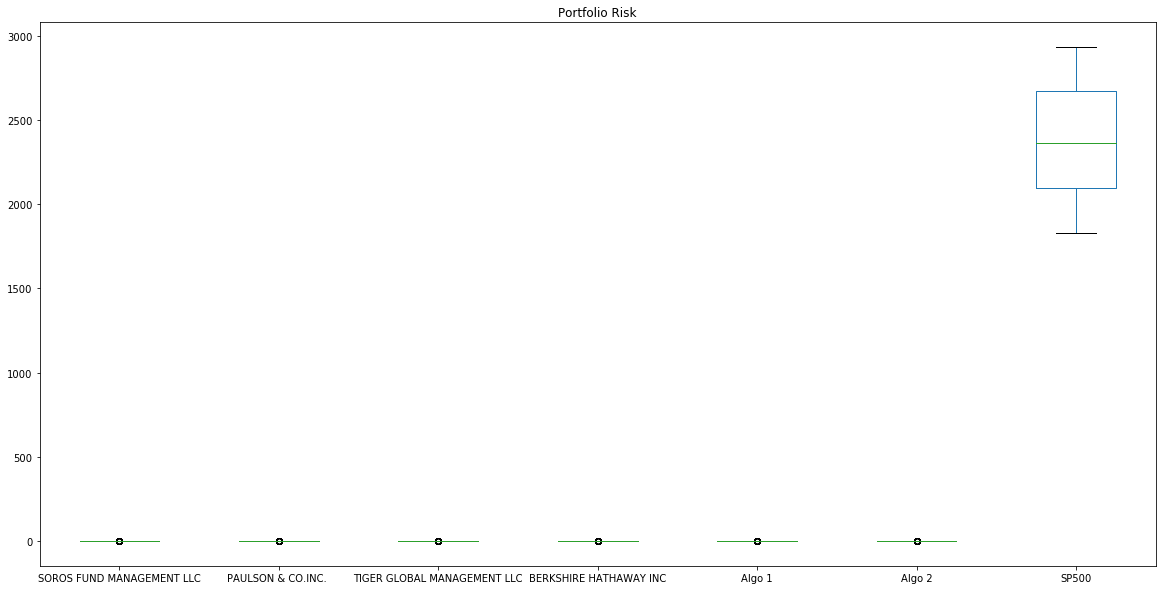

In [23]:
# Box plot to visually show risk
# YOUR CODE HERE
concat_df.plot.box(figsize=(20,10), title="Portfolio Risk")

In [24]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
concat_df.std()

SOROS FUND MANAGEMENT LLC        0.007895
PAULSON & CO.INC.                0.007023
TIGER GLOBAL MANAGEMENT LLC      0.010894
BERKSHIRE HATHAWAY INC           0.012919
Algo 1                           0.007620
Algo 2                           0.008342
SP500                          305.852115
dtype: float64

In [27]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

# Daily standard deviatioin of S&P500
sp500_sd = concat_df["SP500"].std()

# Answering the question: Which portfolios are riskier than the S&P 55?
concat_df.std() > sp500_sd


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

In [28]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annual_std = concat_df.std()*np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC         0.125335
PAULSON & CO.INC.                 0.111488
TIGER GLOBAL MANAGEMENT LLC       0.172936
BERKSHIRE HATHAWAY INC            0.205077
Algo 1                            0.120967
Algo 2                            0.132430
SP500                          4855.251803
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

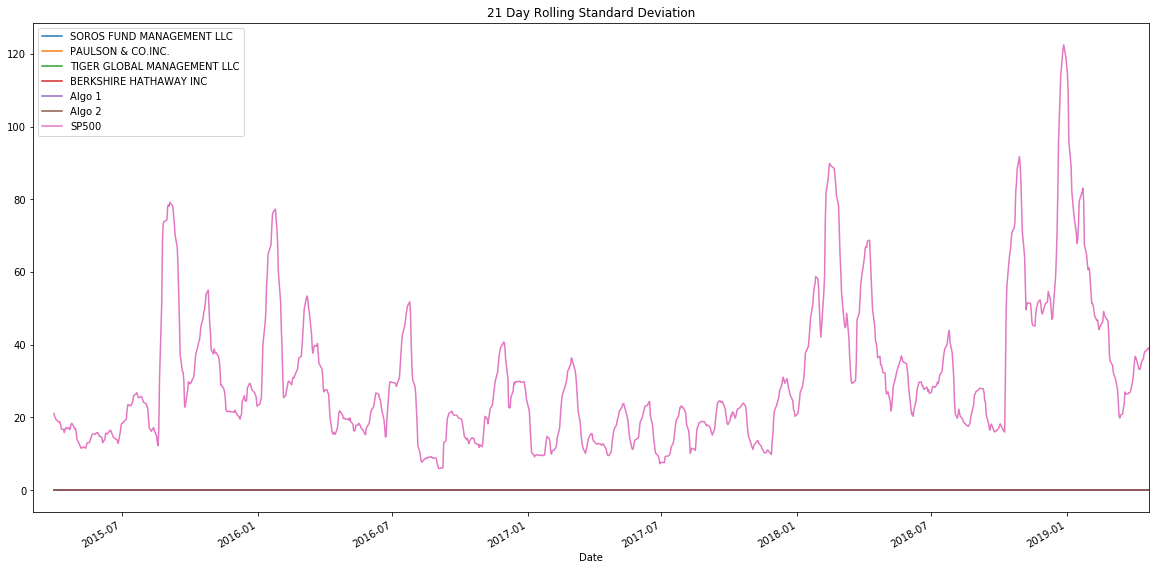

In [32]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
all_roll_std = concat_df.rolling(window=21).std()
all_roll_std.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

In [33]:
# Construct a correlation table
# YOUR CODE HERE
corr_df = concat_df.corr()
corr_df.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1,0.699914,0.561243,0.75436,0.321211,0.826873,0.0339179
PAULSON & CO.INC.,0.699914,1,0.434479,0.545623,0.26884,0.678152,0.0367108
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1,0.424423,0.164387,0.507414,-0.0478227
BERKSHIRE HATHAWAY INC,0.75436,0.545623,0.424423,1,0.292033,0.688082,0.0415467
Algo 1,0.321211,0.26884,0.164387,0.292033,1,0.288243,-0.0126078
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1,0.0362671
SP500,0.0339179,0.0367108,-0.0478227,0.0415467,-0.0126078,0.0362671,1


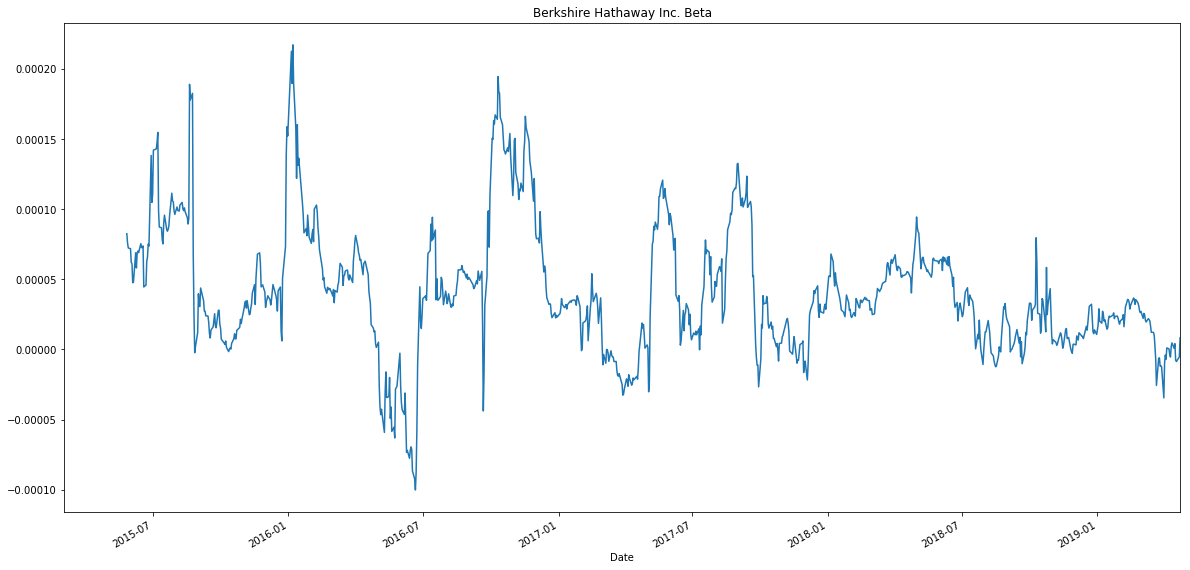

In [35]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
covariance = concat_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(concat_df["SP500"])
variance = concat_df["SP500"].rolling(60).var()
beta = covariance / variance
beta.plot(figsize=(20, 10), title="Berkshire Hathaway Inc. Beta")

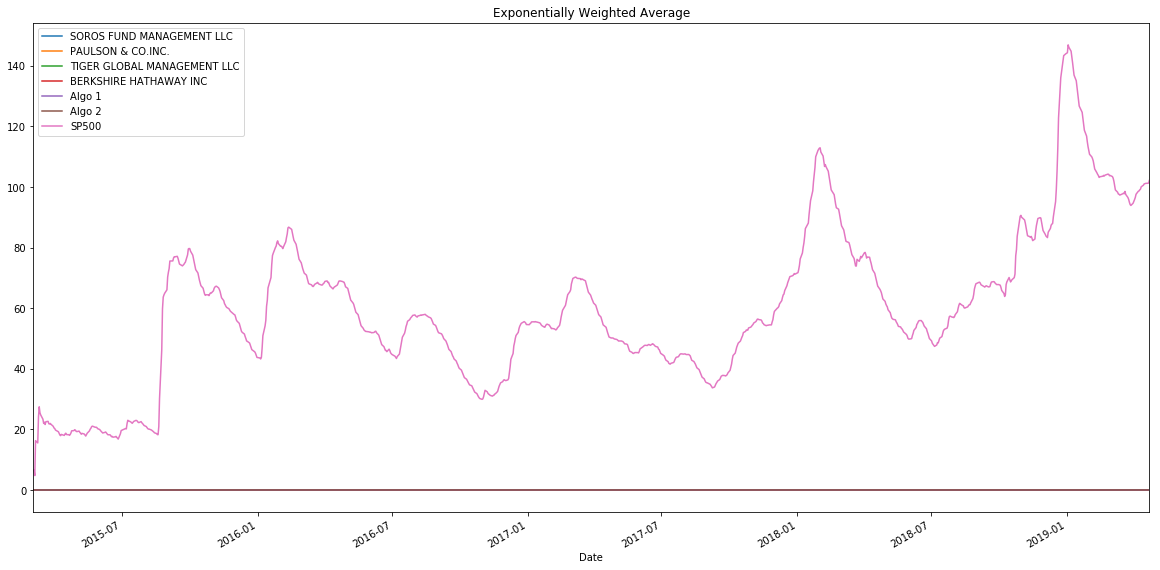

In [36]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
concat_df.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [38]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (concat_df.mean() * 252) / (concat_df.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC        0.356417
PAULSON & CO.INC.               -0.483570
TIGER GLOBAL MANAGEMENT LLC     -0.121060
BERKSHIRE HATHAWAY INC           0.621810
Algo 1                           1.378648
Algo 2                           0.501364
SP500                          123.476112
dtype: float64

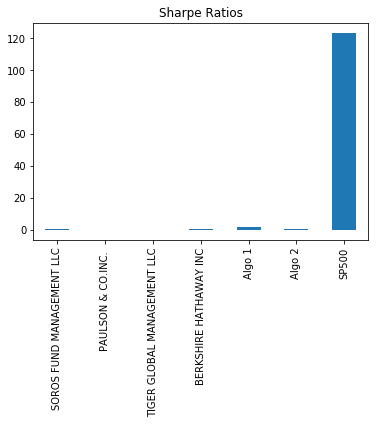

In [39]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [42]:
# Read the first stock
# YOUR CODE HERE
google_historical_csv = Path("Resources/goog_historical.csv")
google_historical = pd.read_csv(
    google_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google_historical = google_historical.sort_index()
google_historical.head()

In [ ]:
# Read the second stock
# YOUR CODE HERE
apple_historical_csv = Path("Resources/aapl_historical.csv")
apple_historical = pd.read_csv(
    apple_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple_historical = apple_historical.sort_index()
apple_historical.head()

In [ ]:
# Read the third stock
# YOUR CODE HERE
costco_historical_csv = Path("Resources/cost_historical.csv")
costco_historical = pd.read_csv(
    costco_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco_historical = costco_historical.sort_index()
costco_historical.head()

In [ ]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
all_stocks = pd.concat([google_historical, apple_historical, costco_historical], axis="rows", join="inner")
all_stocks.head()

In [ ]:
# Reset the index
# YOUR CODE HERE
all_stocks = all_stocks.reset_index()
all_stocks.head()

In [ ]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
portfolio = all_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
portfolio.head()

In [ ]:
# Drop Nulls
# YOUR CODE HERE

#Daily Returns
daily_returns = portfolio.pct_change()

#Dropping NAs
daily_returns = daily_returns.dropna().copy()

#Displaying sample data
daily_returns.head()

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

#Portfolio return
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
conacat_df["Custom"] = portfolio_returns
concat_df.tail()

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
concat_df = concat_df.dropna().copy()

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [ ]:
# Risk
# YOUR CODE HERE
risk = concat_df.std() * np.sqrt(252)
risk

In [ ]:
# Rolling
# YOUR CODE HERE
rolling_std_dev = concat_df.rolling(window=21).std()
rolling_std_dev.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

In [ ]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (concat_df.mean() * 252) / (concat_df.std() * np.sqrt(252))
sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [ ]:
# Create a correlation analysis
# YOUR CODE HERE
df = concat_df.corr()
df.style.background_gradient(cmap="bwr")

In [ ]:
# Beta
# YOUR CODE HERE
covariance = concat_df["Custom"].rolling(window=60).cov(all_portfolios["S&P 500"])
variance = concat_df["S&P 500"].rolling(60).var()
beta = (covariance / variance)
beta.plot(figsize=(20, 10), title="Custom Portfolio Beta")